# Interpretability of a model based on lexicon features

This notebook shows how to use [SHAP](https://github.com/slundberg/shap) to interpret the output of a classifier trained to distinguish between "sexism"/"no sexism" tweets using the dataset from [Waseem and Hovy](https://github.com/ZeerakW/hatespeech). The notebook will serve as background information when extending [A Robust Baseline for Detecting Abusive Language](https://www.overleaf.com/18380535dxwkqqkjsnds#/69381694/) into a long paper for [ISI 2018](http://isi18.azurewebsites.net/).

## Set up
Set up the environment. Load utilities and models, initialize SHAP, the library we'll use to interpret the learned model.

**NOTE** that you'll need a bunch of pickled models to run this notebook. You can either use code from the `interpretability_utils` file to compute and serialize the objects, or you can get the pre-computed objects via Fredrik's [Dropbox](https://www.dropbox.com/sh/7ak3rju7b5pxao7/AABjRVHESxJrj7ofcWOHrRgba?dl=0) (the link might be deleted at anytime!). The pickled models are too big to fit nicely in GitLab. 

Download the contents of the `models`directory and place it in `alw2/interpretability/models/` in your local copy of the Gitlab repository containing the work for alw2 before continuing to play around with this notebook.

In [ ]:
import interpretability_utils

In [2]:
e = interpretability_utils.ExampleExplainer("models/k_means_200_clusters/", "lexicon")

In [3]:
e.initialize()

Loading data from disk
Done loading data


In [4]:
import shap
shap.initjs()

In [9]:
from sklearn.externals import joblib

In [10]:
vectorizer = joblib.load("models/k_means_200_clusters/lexicon_vectorizer.pkl")

## Overview of the data set
Get an overview of the complete test set (536 instances). The graph below shows the most influential 20 features across the data set. Each feature is an entry in Lexicon #2, i.e., the lexicon that resulted in the best performance when its contents was used as features for a classifier. Read the graph like this: the lexicon entry, and thus feature, "sexist" contributes both to the classifier judging a tweet as "sexism" (SHAP values to the right in the graph), and to tweets not being deemed "sexism" (to the left in the graph). Furthermore, high values for the feature (in red) are more likely to render a tweet "sexism" than lower values.

Lexicon entry features lend themselves to intuitive interpretation, since us readers have a notion of the features' semantic meaning. This is not the case when using character n-grams as features. Don't mistake the lack of intuitively meaningful features for uninterpretability!

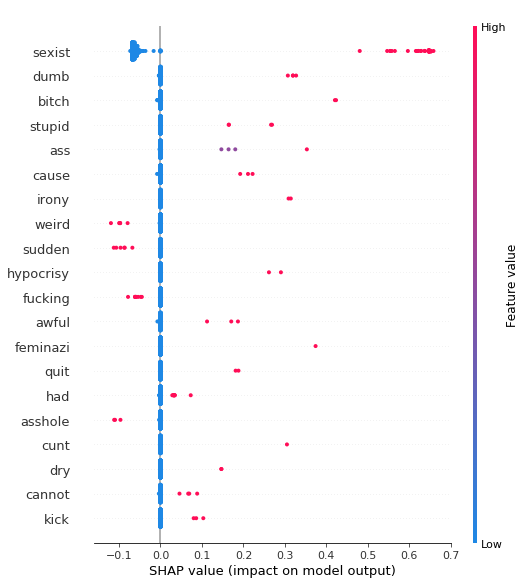

In [11]:
shap.summary_plot(e.shap_values[1], e.testing_documents, feature_names=vectorizer.get_feature_names())

The graph below is another view of the previous graph, only this time, it shows the features ranked according to their contribution to the model's decision based on the mean of the absolute scores. As can be seen, the presence/or no presence of the feature "sexist" has a large impact on the classfier's decision.

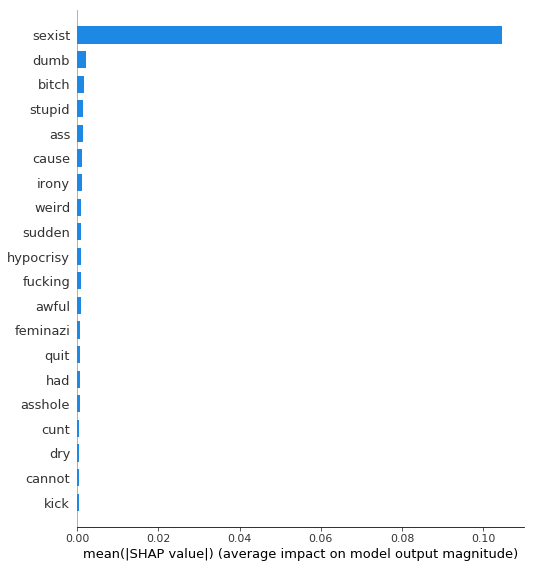

In [12]:
shap.summary_plot(e.shap_values[1], e.testing_documents, feature_names=vectorizer.get_feature_names(), plot_type="bar")

## Interpretation of the classification of individual tweets

Let's move on to interpret individual tweets.

In [13]:
classifier = joblib.load("models/k_means_200_clusters/lexicon_estimator.pkl")

In [14]:
predictions = classifier.predict(e.testing_documents)

Get all the tweets that the model has correctly classified as "sexism", and show them together with their indices to facilitate selection of examples later on.

In [15]:
for i,item in enumerate(list(zip(e.testing_labels_text, predictions, e.testing_documents_text))):
    if item[0] == item[1] and item[1] == "sexism":
        print("idx " + str(i) + ": " + item[2])

idx 29: RT @PhilBrindAmour Call me sexist but female sports anchors r the worst. Makes me uncomfortable when women know more about sports than I do
idx 32: RT @failla21 Call me sexist but I don't think a girl should work at a gym. They are no help when you're alone and you need a spotter.
idx 39: RT @DemaMatar: I'm not sexist but I prefer male professors over females.
idx 45: RT @TheBigKahuna12 I'm not sexist, but I'm just not a fan of all these women rappers.
idx 48: RT @Ezmac_Thedream: Im not sexist, but women just can't drive
idx 50: "We're not just the dumb blondes with the pretty faces" you're certainly not the second part anyway #mkr
idx 64: RT @NigglyPuffsJr: They are trying to replace Jackson with a gal on the 20 dollar bill. I'm not sexist but women spend all our money anyway…
idx 80: RT @maxpascazio: Call me sexist but I don't like a girl who's overly into football
idx 89: Cat you're an ugly and mean bitch! You miss can go fuck yourself! #mkr
idx 99: RT @Man_0f_Steeel I'm not

Unfortunately, I couldn't wrap the following code in a function and still make shap display the graph in the notebook. Hence, you have to run the following two notebook cells for each example you wish to show (or copy their contents to new cells if you wish to freeze an example).

1. Select an example in the list above. Take note of its idx value.
2. Input the idx value to the `show` function.
3. Run the `shap.force_plot(...` cell.
4. The example should be visible as a graph/image as a result.

In [16]:
index = e.show(557)

Showing testing example with index: 557
Text: RT @TheLiamJohnson nah im not sexist but female rappers cant.
Label: sexism


In [17]:
shap.force_plot(e.explainer.expected_value[1], e.shap_values[1][index, :], e.testing_documents.iloc[index, :])